In [1]:
from IPython.display import HTML as html_print
import pandas as pd
import spacy
import nltk
import re

## 1 Pré-processamento

### 1.1 Limpeza do dataframe

In [2]:
df = pd.read_csv("chico_data.csv", index_col=0).rename(columns={'title':'título','lyrics':'letra'}).reset_index(drop=True)
#importa o .csv

df['título'] = [df['título'][i].strip() for i in range(len(df['título']))] #remove os primeiros caracteres de cada coluna
df['letra'] = [df['letra'][i][1:-1] for i in range(len(df['letra']))]

df.head(20)

,título,letra
0,A Aurora de Nova Iorque,A aurora de nova iorque tem\n Quatro colunas d...
1,a Banda,Estava à toa na vida\nO meu amor me chamou\nPr...
2,a Bela E a Fera,"Ouve a declaração, oh bela\nDe um sonhador tit..."
3,a Cidade Dos Artistas,Na cidade\nSer artista\nÉ posar sorridente\nÉ ...
4,a Cidade Ideal,[introdução]\nJumento: Àquela altura da estrad...
5,a Foto Da Capa,O retrato do artista quando moço\nNão é promis...
6,a Galinha,[introdução]\nJumento: Acabou?\nCalma companhe...
7,a História De Lily Braun,Como num romance\nO homem dos meus sonhos\nMe ...
8,A Ilha,Um facho de luz\nQue a tudo seduz \nPor aqui\n...
9,a Mais Bonita,"Não, solidão, hoje não quero me retocar\nNesse..."


### 1.2 Funções de pré-processamento

In [3]:
def pre_processamento(texto, string_unica=False):
    '''
    Remove outros caracteres que não são letras e também remove stopwords.
    Printa a porcentagem de palavras relevantes.
    -----------
    Params:
    -----------
        texto : str
            Texto completo.
        string_unica : bool
            Defina True para retornar uma string única pré-processada. 
    '''
    
    #limpeza das letras
    apenas_letras_minusculas =  re.findall(r'\b[A-zÀ-úü]+\b', texto.lower()) #retorna lista com palavras do texto em minúsculas
    
    #limpeza das stopwords
    nltk.download('stopwords')
    stopwords = nltk.corpus.stopwords.words('portuguese')
    esquecidas = ['tá', 'pra', 'né', '\n','\n ', '\n\n', '\n\n ', '\n\n\n', '…']
    stopwords = stopwords + esquecidas
    
    palavras_relevantes = [palavra for palavra in apenas_letras_minusculas if palavra not in stopwords]

    #Calcula a fração entre as palavras relevantes e o universo total
    content_fraction = len(palavras_relevantes)/len(apenas_letras_minusculas)
    print("Content fraction: " + str(content_fraction)) #printa a fração
    
    if string_unica:
        palavras_string_unica = " ".join(palavras_relevantes)
        return palavras_string_unica
    
    return palavras_relevantes

def destaque_texto(texto, palavras, cor):
    '''
    Retorna string com palavras destacadas coloridas pronta para ser impressa no hmtl_print().
    -----------
    Params:
    -----------
        texto : str
            Texto completo.
        palavras : list
            Lista com palavras a serem destacadas.
        cor : str
            Cor de destaque das palavras
    '''
    palavras.sort(key=len)
    palavras.reverse()
    for palavra in palavras:
        padrao = re.compile(palavra, re.IGNORECASE)
        texto = padrao.sub("<text style=color:{}>{}</text>".format(cor, palavra), texto)
        #texto = texto.replace(palavra, "<text style=color:{}>{}</text>".format(cor, palavra))
    texto = texto.replace("\n", "<br>")
    texto = texto.replace("\n\n", "<br><br>")
    return texto

def lemmatizacao(texto, string_unica=False, exceto=None):
    '''
    Retorna uma lista (ou uma string) com o texto lemmatizado.
    -----------
    Params:
    -----------
        texto : str
            Texto completo.
        string_unica : bool
            Defina True para retornar uma string única pré-processada. 
        exceto : str ou list
            Indicação da classe gramatical a não ser lematizada conforme legenda:
                ADJ: adjective
                ADP: adposition
                ADV: adverb
                AUX: auxiliary verb
                CONJ: coordinating conjunction
                DET: determiner
                INTJ: interjection
                NOUN: noun            
                NUM: numeral
                PART: particle
                PRON: pronoun
                PROPN: proper noun
                PUNCT: punctuation
                SCONJ: subordinating conjunction
                SYM: symbol
                VERB: verb
                X: other
    '''
    spc = spacy.load('pt_core_news_sm') #load do pipeline para português
    tokens = spc(texto) #TOKENIZAÇÃO

    if isinstance(exceto, str): #verifica se recebeu string
        exceto = [exceto]
    
    if isinstance(exceto, list): #verifica se recebeu lista
        lemmas = [token.text if token.pos_ in exceto else token.lemma_ for token in tokens]
        #separa os lemmas conforme a indicação gramatical
    
    else:
        lemmas = [token.lemma_ for token in tokens]
        
    if string_unica:
        lemmas_string_unica = " ".join(lemmas)
        return lemmas_string_unica
    
    return lemmas
    

def tabela_lemmatizacao(texto, string_unica=False):
    '''
    Retorna um DataFrame com informações da lemmatização ("token", "lemma", "classe-gramartical", "flexão").
    -----------
    Params:
    -----------
        texto : str
            Texto completo.
        string_unica : bool
            Defina True para retornar uma string única pré-processada. 
    '''
    spc = spacy.load('pt_core_news_sm')
    tokens = spc(texto)
    lemmas = []
    for token in tokens:
        lemmas.append([token.text, token.lemma_, token.pos_, token.tag_])
    return pd.DataFrame(lemmas, columns = ["token", "lemma", "classe-gramatical", "flexão"])

#print(spacy.explain("PROPN"))

### 1.3 Análise das bibliotecas
#### 1.3.1 Destaque para palavras relevantes (nltk)

In [4]:
cancao = df['letra'][45]  
palavras_relevantes =  pre_processamento(cancao)
html_print(destaque_texto(cancao, palavras_relevantes, 'blue'))

Content fraction: 0.48863636363636365


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\migue\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 1.3.2 Tabela de Lemmatização (spacy)

In [5]:
tabela = tabela_lemmatizacao("Morena de Angola que mexe o chocalho amarrado na canela. Será que ela mexe o chocalho ou o chocalho é que mexe com ela?")
tabela

,token,lemma,classe-gramatical,flexão
0,Morena,Morena,PROPN,PROPN__Gender=Masc|Number=Sing
1,de,de,ADP,ADP
2,Angola,Angola,PROPN,PROPN__Gender=Fem|Number=Sing
3,que,que,PRON,PRON__Gender=Fem|Number=Sing|PronType=Rel
4,mexe,mexer,VERB,VERB__Mood=Ind|Number=Sing|Person=3|Tense=Pres...
5,o,o,DET,DET__Definite=Def|Gender=Masc|Number=Sing|Pron...
6,chocalho,chocalhar,NOUN,NOUN__Gender=Masc|Number=Sing
7,amarrado,amarrar,VERB,VERB__Gender=Masc|Number=Sing|VerbForm=Part
8,na,o,DET,ADP_DET__Definite=Def|Gender=Fem|Number=Sing|P...
9,canela,canelar,NOUN,NOUN__Gender=Fem|Number=Sing


In [6]:
tabela = tabela_lemmatizacao("Pra ver a banda passar, cantando coisas de amor")
tabela[['token', 'lemma', 'classe-gramatical']].T

,0,1,2,3,4,5,6,7,8,9
token,Pra,ver,a,banda,passar,",",cantando,coisas,de,amor
lemma,Pra,ver,o,bandar,passar,",",cantar,coisa,de,amor
classe-gramatical,NOUN,VERB,DET,NOUN,VERB,PUNCT,VERB,NOUN,ADP,NOUN


In [7]:
'''cancioneiro = " ".join(df["letra"])

palavras_relevantes =  pre_processamento(cancioneiro, string_unica=True)
palavras_relevantes = lemmatizacao(palavras_relevantes)

print("Palavras relevantes (total): " + str(len(palavras_relevantes)))
palavras_relevantes_única = set(palavras_relevantes)
print("Palavras relevantes (únicas): " + str(len(palavras_relevantes_única)))

tokens = nltk.tokenize.word_tokenize(" ".join(palavras_relevantes))
fd = nltk.probability.FreqDist(tokens)
fd.most_common(40)

#processamento com lemmatização'''

'cancioneiro = " ".join(df["letra"])\n\npalavras_relevantes =  pre_processamento(cancioneiro, string_unica=True)\npalavras_relevantes = lemmatizacao(palavras_relevantes)\n\nprint("Palavras relevantes (total): " + str(len(palavras_relevantes)))\npalavras_relevantes_única = set(palavras_relevantes)\nprint("Palavras relevantes (únicas): " + str(len(palavras_relevantes_única)))\n\ntokens = nltk.tokenize.word_tokenize(" ".join(palavras_relevantes))\nfd = nltk.probability.FreqDist(tokens)\nfd.most_common(40)\n\n#processamento com lemmatização'

## 2. Processamento

### 2.1 Load da base, do pipeline para o português (spacy) e das stopwords (nltk)

In [8]:
cancioneiro = " ".join(df["letra"])

spc = spacy.load('pt_core_news_sm') #load do pipeline para português
tokens = spc(cancioneiro.lower()) #TOKENIZAÇÃO da base em caixa baixa

nltk.download('stopwords') #load das stopwords
stopwords = nltk.corpus.stopwords.words('portuguese')
esquecidas = ['tá', 'pra', 'né', '\n','\n ', '\n\n', '\n\n ', '\n\n\n', '…']
stopwords = stopwords + esquecidas

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\migue\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2.2 Lemmatização

In [9]:
tokens_lemmatizados = []

for token in tokens:
    if token.text.lower() not in stopwords and token.pos_ != 'PUNCT' and not token.is_stop: #exclui stopwords e pontuação
        if token.pos_ == 'VERB':
            tokens_lemmatizados.append(token.lemma_.lower()) #lemmatização dos verbos
        else:
            tokens_lemmatizados.append(token.text.lower())
            
fracao_conteudo = len(tokens_lemmatizados)/len(tokens)
print("Fração de conteúdo: " + str(fracao_conteudo)) #printa a fração

Fração de conteúdo: 0.3522834021843699


## 3 Análise

### 3.1 Frequência e distribuição (nltk)

In [10]:
frequencia = nltk.probability.FreqDist(tokens_lemmatizados)
frequencia.most_common(15)

[('amor', 304),
 ('dia', 208),
 ('cantar', 197),
 ('gente', 196),
 ('vida', 180),
 ('passar', 165),
 ('ficar', 159),
 ('levar', 157),
 ('olhar', 156),
 ('mim', 154),
 ('samba', 153),
 ('vou', 151),
 ('vir', 151),
 ('fazer', 148),
 ('ver', 148)]

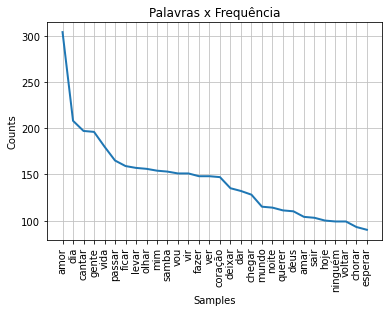

<AxesSubplot:title={'center':'Palavras x Frequência'}, xlabel='Samples', ylabel='Counts'>

In [11]:
frequencia.plot(30,title = "Palavras x Frequência")

### 3.2 Concordância e similaridade (nltk)

In [12]:
texto_cancioneiro = nltk.Text(tokens_lemmatizados)
texto_cancioneiro.concordance('samba')

Displaying 25 of 153 matches:
arnaval passar esperar ninguém levar samba prosseguir contrario samba comprar b
uém levar samba prosseguir contrario samba comprar briga samba abrir mão amanhã
seguir contrario samba comprar briga samba abrir mão amanhã ninguém traga-me vi
ar violão batucada evoluçao tristeza samba ferver corpo porta-estandarte violão
uros juro amor reprimir grito conter samba escuro inventar tristeza fineza desi
so prometer amar contar encontro rua samba amigo casa peito abrigo trabalho sos
salvar floresta salvar poesia salvar samba esquecimento baixe manto manto cinze
salvar floresta salvar poesia salvar samba esquecimento baixe manto manto cinze
vinda benvinda benvinda pinho chorar samba pedir sozinho iluminar escuro entrar
almente vingar vou espalhar compasso samba disfarçar cansaço joana braço carreg
gu cabo polícia merci beaucoup ouvir samba breque maurice chevalier bebo toulou
ote sambar lama causar frisson olhar samba cócoras terra sapo sapatear toró can
 cantar po

In [13]:
texto_cancioneiro.concordance("mulher")

Displaying 25 of 82 matches:
 chorar 
 
 seguir paz brigar acolá mulher anibal zé angá brincadeira brejo vé
ibal zé angá brincadeira brejo véio mulher anibal dançar saber acontecer zé in
beça retirar estrada pau tava comer mulher aníbal zé angá brigar acolá pergunt
 querer conquistar quebrar-lhe cara mulher homem respeitar dotô xumara subdele
as macas vacas pratas ana amsterdam mulher cantar estribilho querer embalar fi
r embalar filho morar escuridão mar mulher cantar lamento querer lembrar torme
rer lembrar tormento filho suspirar mulher cantar arranjo querer agasalhar anj
asalhar anjo deixar corpo descansar mulher cantar dobrar sino querer cantar me
ar sino querer cantar menino cantar mulher cantar estribilho querer embalar fi
undo sequer noites alucinação passo mulher homens exibir fingir sentir prazer 
igarro acabar renda dar praga capim mulher fugir dono venda mim lembro pronde 
mantes rolar chão ouro poeira muita mulher passar sabão papoula cheirar vender
a sair abaixar fronte s

In [14]:
texto_cancioneiro.similar('poesia')

hoje festa prazer floresta futebol


In [15]:
texto_cancioneiro.similar('gente')

ninguém canto levar sol olhar praça jumento ah feliz olhos solidão
chorar terra comprar chuva guri samba contente explicar crescer


In [16]:
texto_cancioneiro.collocations()

tao tao; vivo rei; laiá laiá; filha gosta; pai afasta; esfarrapado
; afasta mim; acorda acorda; ondas ondas; benvinda benvinda; mim
cálice; falar esfarrapado; calar boca; rei ramos; pedro pedreiro;
gosta gostar; cara roto; querias dividida; amarrar canela; roto falar


In [17]:
texto_cancoes = nltk.Text(pre_processamento(cancioneiro, string_unica=False))

texto_cancoes.collocations()

Content fraction: 0.5466347600555977


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\migue\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


tao bom; bom tao; viva rei; todo mundo; acorda acorda; laiá laiá;
façamos vamos; vai levando; fazem façamos; pai afasta; afasta mim;
falando esfarrapado; cala boca; roto falando; benvinda benvinda; gente
vai; mim cálice; sambando lama; amarrado canela; filha gosta
